In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('spotify_tracks.csv')

In [3]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
new_df =df.drop(['Unnamed: 0','track_id','artists','album_name','track_name','explicit','track_genre'], axis=1)

In [5]:
new_df.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [6]:
new_df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [7]:
new_df.shape

(114000, 14)

In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        114000 non-null  int64  
 1   duration_ms       114000 non-null  int64  
 2   danceability      114000 non-null  float64
 3   energy            114000 non-null  float64
 4   key               114000 non-null  int64  
 5   loudness          114000 non-null  float64
 6   mode              114000 non-null  int64  
 7   speechiness       114000 non-null  float64
 8   acousticness      114000 non-null  float64
 9   instrumentalness  114000 non-null  float64
 10  liveness          114000 non-null  float64
 11  valence           114000 non-null  float64
 12  tempo             114000 non-null  float64
 13  time_signature    114000 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 12.2 MB


C:\Users\my pc\AppData\Local\Temp\ipykernel_9692\498548477.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  new_df.hist(ax=ax, bins = 30)


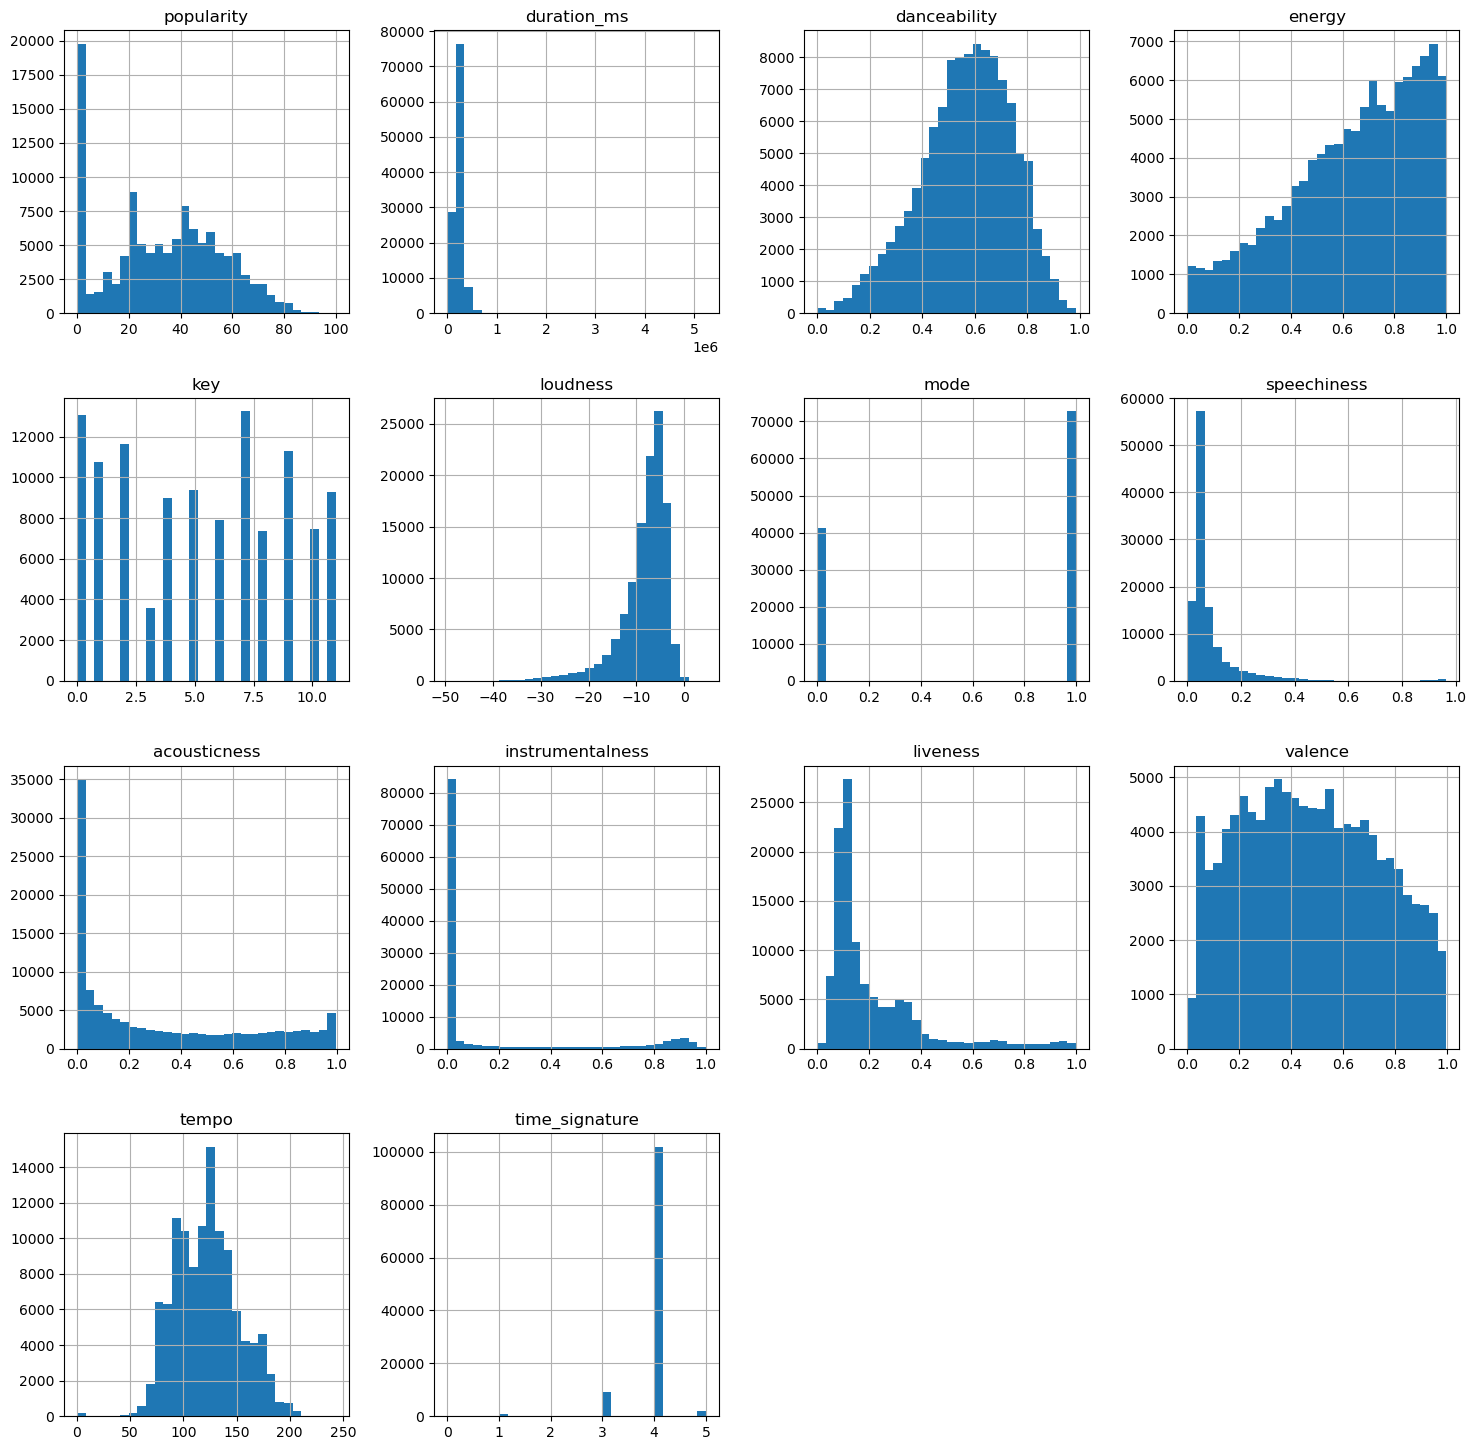

In [9]:
# PLOTTING HISTOGRAMS FOR ALL VARIABLES
fig = plt.figure(figsize=(18,18))
ax = fig.gca()
new_df.hist(ax=ax, bins = 30)
plt.show()

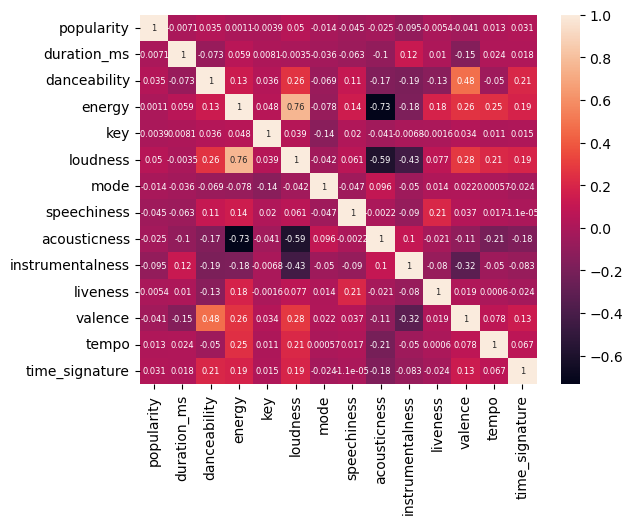

In [10]:
# # calculate the correlation matrix
corr = new_df.corr()

# plot the heatmap
sns.heatmap(corr , annot = True , annot_kws={"size": 6})
plt.show()

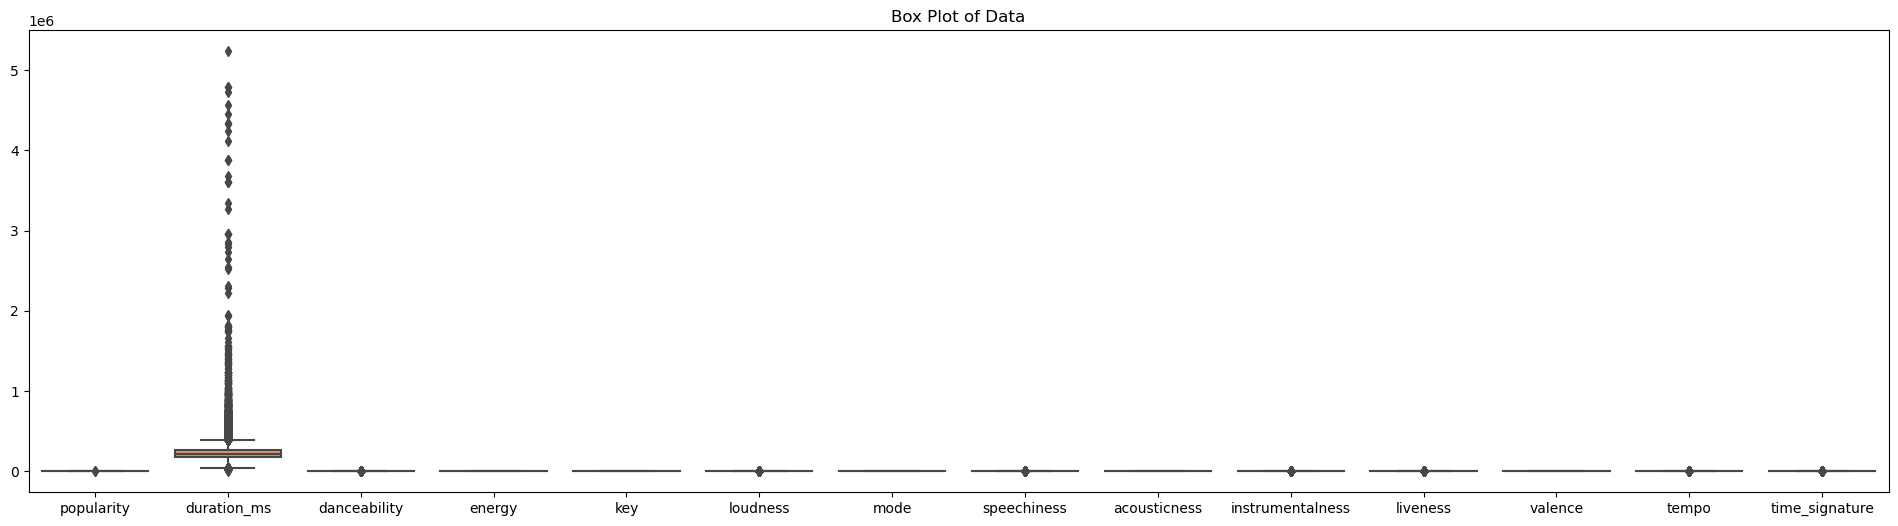

In [11]:
plt.figure(figsize=(24, 6))
sns.boxplot(data=new_df)
plt.title('Box Plot of Data')
plt.show()

In [12]:
numerical_cols = ['duration_ms']

In [13]:
for col in numerical_cols:
    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((new_df[col] < (Q1 - 1.5 * IQR)) | (new_df[col] > (Q3 + 1.5 * IQR)))
    data = new_df[~outliers]

C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\clust

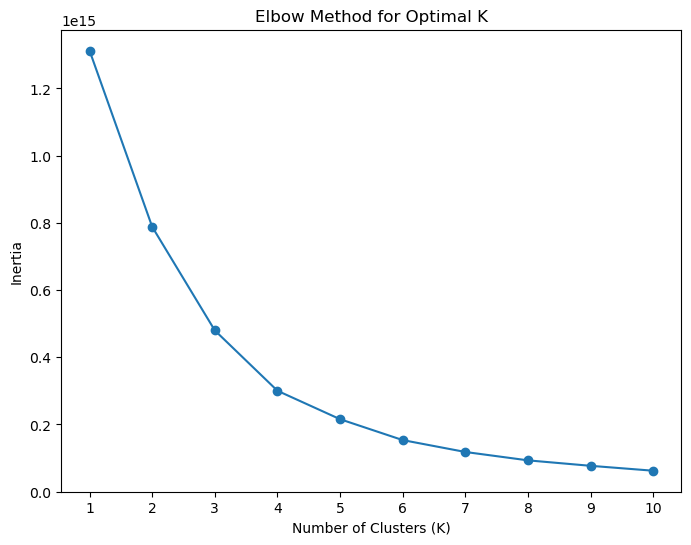

In [16]:
inertia_values = []
k_range = range (1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k , random_state=42)
    kmeans.fit(new_df)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(k_range,inertia_values,marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\clust

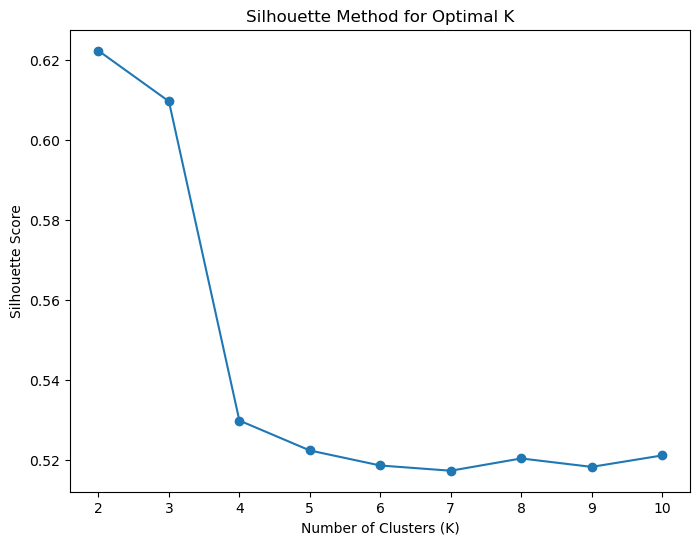

In [19]:
silhouette_scores = []
k_range = range(2, 11)  # Try different values of K from 2 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(new_df)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(new_df, labels))

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.xticks(k_range)
plt.show()

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
dis_scaled = scaler.fit_transform(df[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']])

In [21]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(dis_scaled)

C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [27]:
dbscan = DBSCAN(eps=0.2, min_samples=2)
dbscan.fit(dis_scaled)

DBSCAN(eps=0.2, min_samples=2)

In [ ]:
def main():
    st.title('Spotify Recommendation System')
    st.write('Input your preferences below and get song recommendations!')

    # Create sliders for user preferences
    danceability = st.slider('Danceability', 0, 100, 25, 10)
    energy = st.slider('Energy', 0, 100, 25, 10)
    key = st.slider('Key', 0, 100, 25, 10)
    loudness = st.slider('Loudness', 0, 100, 25, 10)
    mode = st.slider('Mode', 0, 100, 25, 10)
    speechiness = st.slider('Speechiness', 0, 100, 25, 10)
    acousticness = st.slider('Acousticness', 0, 100, 25, 10)
    instrumentalness = st.slider('Instrumentalness', 0, 100, 25, 10)
    liveness = st.slider('Liveness', 0, 100, 25, 10)
    valence = st.slider('Valence', 0, 100, 25, 10)
    tempo = st.slider('Tempo', 0, 100, 50, 10)
    

    if st.button('Get Recommendations through K-Means'):
        # Preprocess user input
        user_input = scaler.transform([[danceability, energy, key, loudness, mode, speechiness,
       acousticness, instrumentalness, liveness, valence, tempo,
       duration_ms]])
        # Predict user's cluster using the K-means model
        user_cluster = kmeans.predict(user_input)
        # Get recommended songs based on the cluster
        recommended_songs = data[kmeans.labels_ == user_cluster[0]][['artists','album_name','track_name']]

        # Display the recommended songs
        st.subheader('Recommended Songs:')
        st.write(recommended_songs)
    
    if st.button('Get Recommendations through DBSCAN'):
        # Preprocess user input
        user_input = scaler.transform([[danceability, energy, key, loudness, mode, speechiness,
       acousticness, instrumentalness, liveness, valence, tempo,
       duration_ms]])
        # Predict user's cluster using the K-means model
        user_cluster = dbscan.predict(user_input)
        # Get recommended songs based on the cluster
        recommended_songs = data[dbscan.labels_ == user_cluster[0]][['name','artists','track_name']]

        # Display the recommended songs
        st.subheader('Recommended Songs:')
        st.write(recommended_songs)

if __name__ == '__main__':
    main()